<a href="https://colab.research.google.com/github/FranciscoTeon/Video-game-ratings-best-to-worst-Data-Analysis/blob/main/imdb_videogame_ratings_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
imdb_df = pd.read_csv('imdb_df.csv')
imdb_df.head()

,title,year,genre,rating,votes,directors,plot
0,The Last of Us: Part I,2022.0,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,Red Dead Redemption II,2018.0,"Action, Adventure, Crime",9.7,36441,Missing,Amidst the decline of the Wild West at the tur...
2,The Witcher 3: Wild Hunt - Blood and Wine,2016.0,"Action, Adventure, Drama",9.7,7610,Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,The Witcher 3: Wild Hunt,2015.0,"Action, Adventure, Drama",9.7,26328,Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,The Last of Us,2013.0,"Action, Adventure, Drama",9.7,61103,"Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."


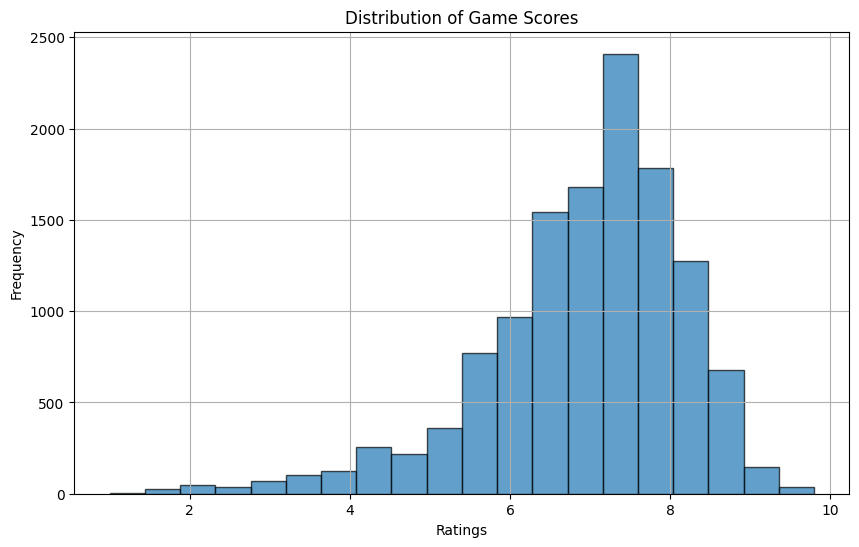

In [ ]:
#What is the distribution of game scores across the entire dataset?
plt.figure(figsize=(10, 6))
plt.hist(imdb_df['rating'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Game Scores')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
#How many unique game titles are present in the dataset?
unique_titles = imdb_df['title'].nunique()
print(f"The number of unique game titles are: {unique_titles}")

The number of unique game titles are: 12260


In [ ]:
#What is the average score for games across the dataset?
avg_score = imdb_df['rating'].mean()
print(f"The average score for games across all platforms is: {avg_score}")

The average score for games across all platforms is: 6.946249601021385


In [ ]:
#Which genres are the most common in the dataset?
genre_counts = imdb_df['genre'].value_counts()
print(genre_counts)

genre
Action                          1392
Action, Adventure, Fantasy      1309
Sport                            788
Adventure                        699
Action, Sci-Fi                   526
                                ... 
Horror, Mystery, Romance           1
Adventure, Horror, Music           1
Crime, Drama, Horror               1
Adventure, Fantasy, War            1
Action, Adventure, Game-Show       1
Name: count, Length: 390, dtype: int64


In [ ]:
#What are the top 10 highest-rated games?
top_10_highest_games = imdb_df[['title', 'rating']].nlargest(10, 'rating')
print(top_10_highest_games)

                                       title  rating
0                     The Last of Us: Part I     9.8
1                     Red Dead Redemption II     9.7
2  The Witcher 3: Wild Hunt - Blood and Wine     9.7
3                   The Witcher 3: Wild Hunt     9.7
4                             The Last of Us     9.7
5             Mass Effect: Legendary Edition     9.7
6                                 God of War     9.6
7                            Persona 5 Royal     9.6
8       The Legend of Zelda: Ocarina of Time     9.6
9                           Metal Gear Solid     9.6


In [ ]:
#What are the top 10 lowest-rated games?
top_10_lowest_games = imdb_df[['title', 'rating']].nsmallest(10, 'rating')
print(top_10_lowest_games)

                           title  rating
12531                   CrazyBus     1.0
12530        Animal Soccer World     1.2
12528                  Action 52     1.3
12529   Plumbers Don't Wear Ties     1.3
12526  Ride to Hell: Retribution     1.4
12527                   Superman     1.4
12521      Hunt Down the Freeman     1.5
12522           E.T. Phone Home!     1.5
12523           Jenga World Tour     1.5
12524        Super Noah's Ark 3D     1.5


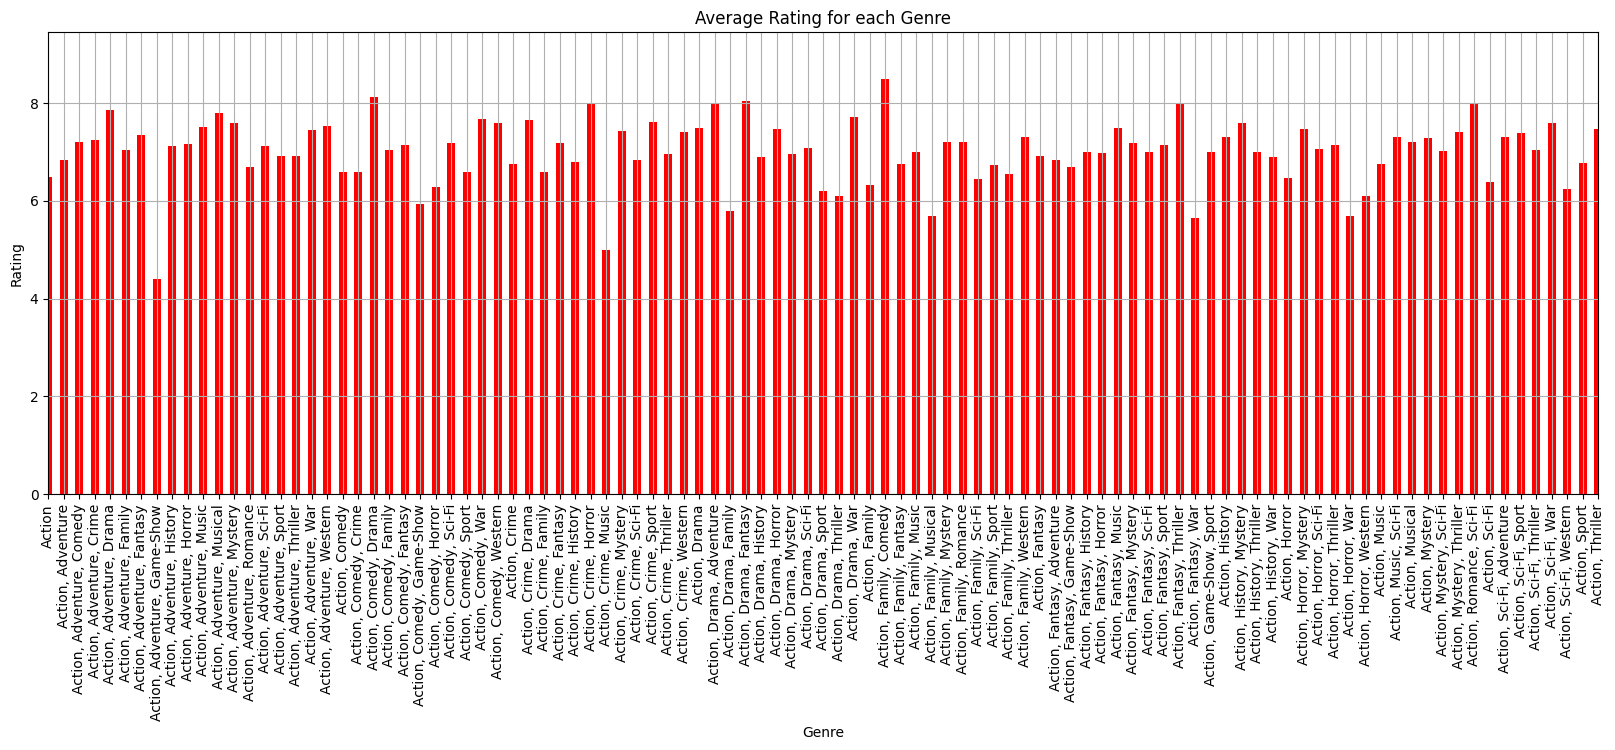

In [ ]:
#What is the average score for each genre?
plt.figure(figsize=(20, 6))
imdb_df.groupby('genre')['rating'].mean().plot(kind="bar", color = 'red')
plt.title('Average Rating for each Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.grid(True)
plt.xlim(0, 100)

plt.show()

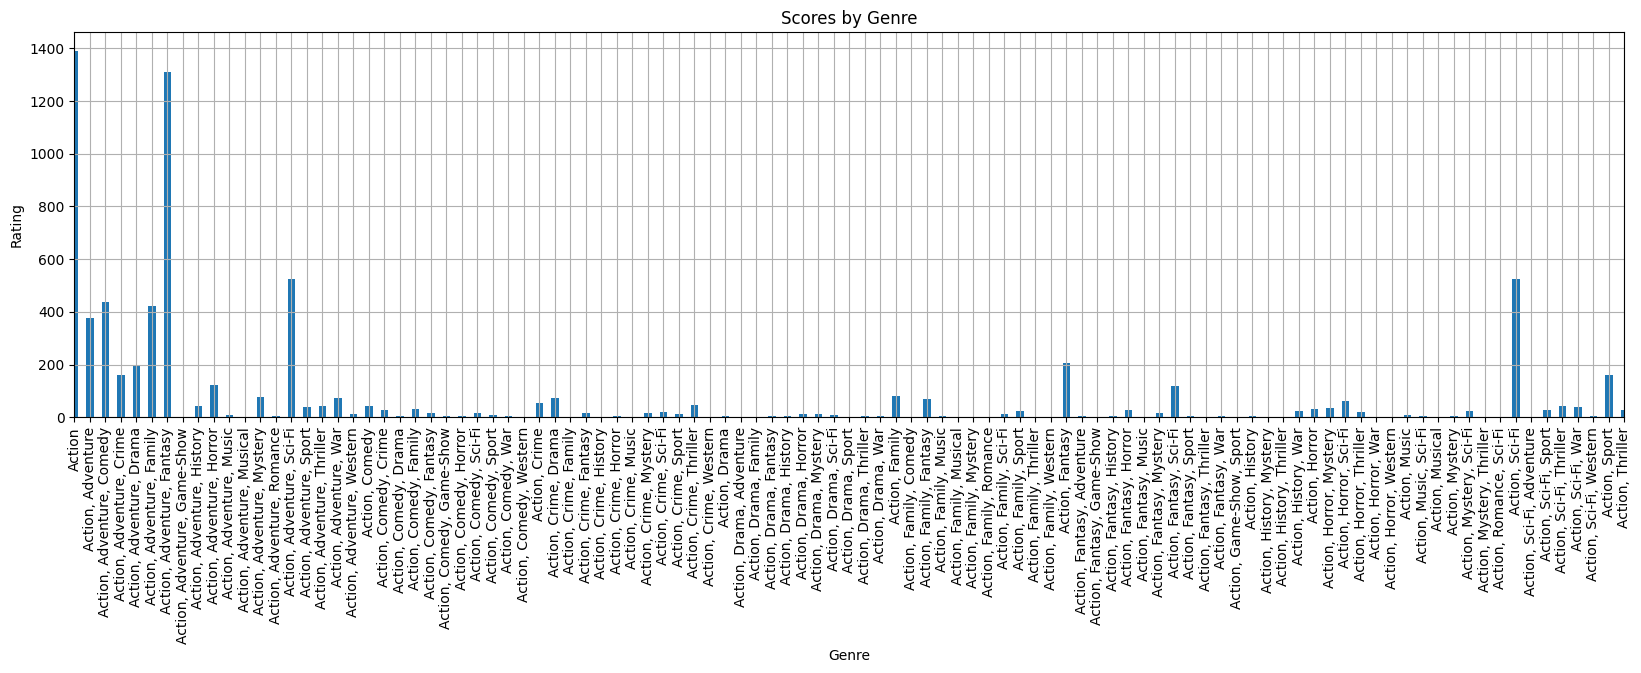

In [ ]:
#How do scores vary by genre?
plt.figure(figsize=(20, 5))
imdb_df.groupby('genre')['rating'].count().plot(kind="bar")
plt.title('Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.grid(True)
plt.xlim(0, 100)
plt.show()

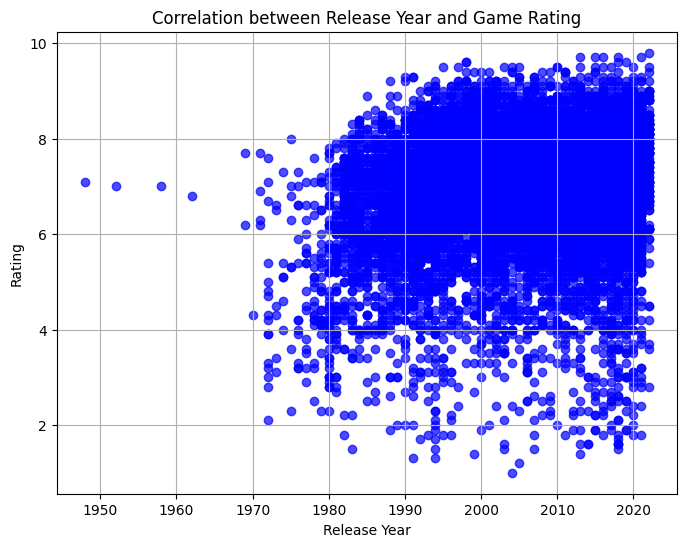

In [ ]:
#Is there any correlation between release year and game scores?
plt.figure(figsize=(8, 6))
plt.scatter(imdb_df['year'], imdb_df['rating'], color='blue', alpha=0.7)
plt.title('Correlation between Release Year and Game Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

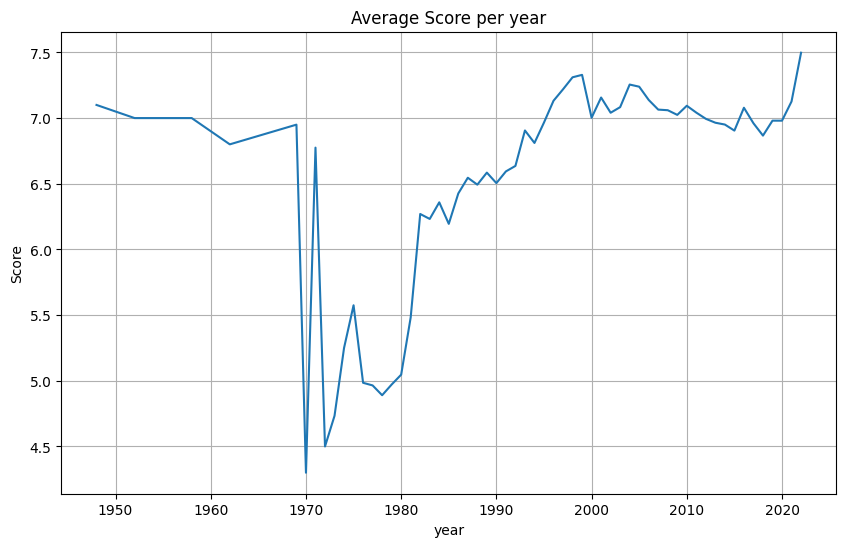

In [ ]:
#Which year had the highest average game score?
plt.figure(figsize=(10, 6))
imdb_df.groupby('year')['rating'].mean().plot(kind="line")

plt.title('Average Score per year')
plt.xlabel('year')
plt.ylabel('Score')
plt.grid(True)

plt.show()


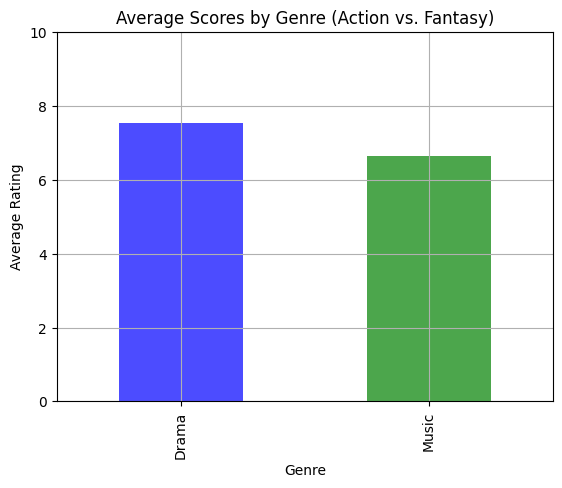

In [ ]:
#How do scores differ between specific genres (e.g., Action vs. RPG)?
ign_df = imdb_df.assign(genre=imdb_df['genre'].str.split(',')).explode('genre').reset_index(drop=True)

# Strip any leading/trailing whitespace from the 'genre' column
imdb_df['genre'] = imdb_df['genre'].str.strip()

# Filter the DataFrame for specific genres (e.g., Action and RPG)
specific_genres = ign_df[ign_df['genre'].isin(['Music', 'Drama'])]

# Calculate the average score for each genre
average_scores_by_genre = specific_genres.groupby('genre')['rating'].mean()

# Plot the average scores by genre in a bar graph
average_scores_by_genre.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Average Scores by Genre (Action vs. Fantasy)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.grid(True)
plt.show()


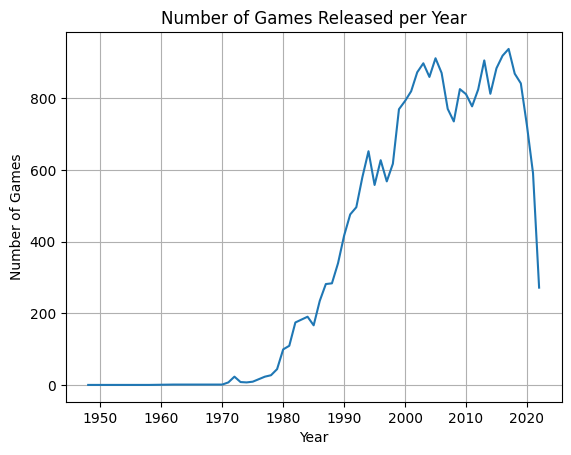

In [ ]:
#How has the number of games released per year changed over time?
ign_df.groupby('year')['title'].count().plot(kind='line')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)

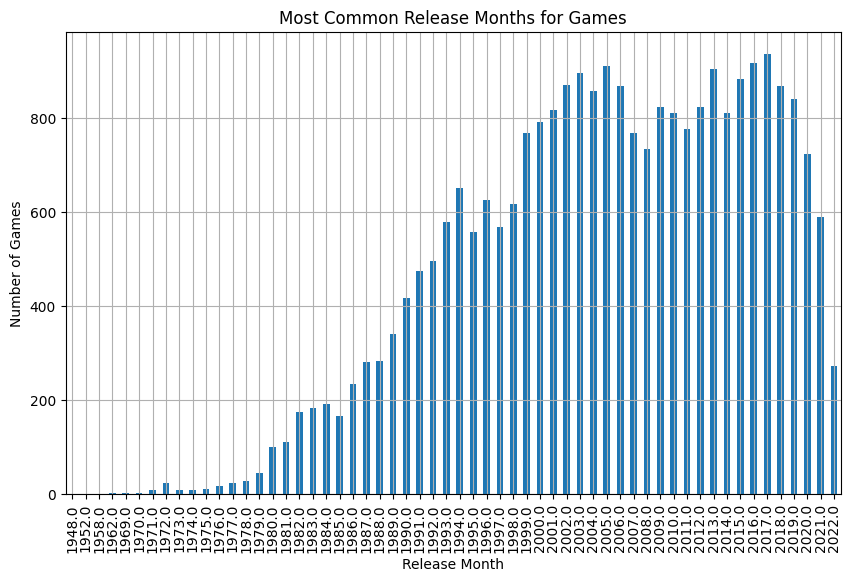

In [ ]:
#How many game released per year?
plt.figure(figsize=(10, 6))
ign_df.groupby('year')['title'].count().plot(kind='bar')
plt.title('Most Common Release Months for Games')
plt.xlabel('Release Month')
plt.ylabel('Number of Games')
plt.grid(True)

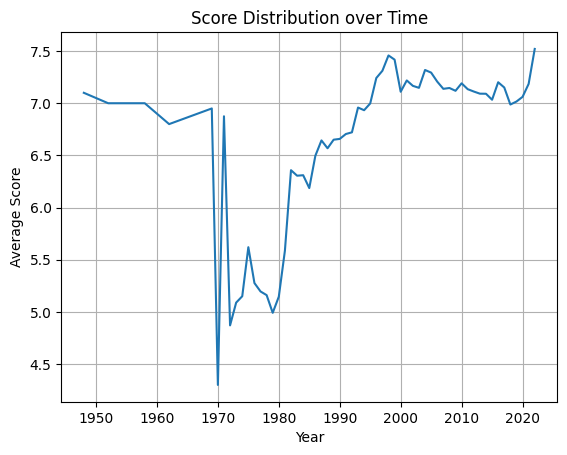

In [ ]:
#Are there trends in the score distribution over time?
ign_df.groupby('year')['rating'].mean().plot(kind='line')
plt.title('Score Distribution over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)

In [ ]:
#Which genre has the highest-rated games on average?
avg_score_by_genre = ign_df.groupby('genre')['rating'].mean()
highest_rated_genre = avg_score_by_genre.idxmax()
print(f"The genre with the highest-rated games on average is: {highest_rated_genre}")

The genre with the highest-rated games on average is: Biography


In [ ]:
#Average score per genre?
specif_score = ign_df.groupby('genre')['rating'].mean()
specif_score.head(30)

,rating
genre,
Action,7.073930
Adventure,7.211517
Biography,5.700000
Comedy,7.194260
Crime,7.240152
Drama,7.705508
Family,6.863886
Fantasy,7.253375
Game-Show,6.509524


In [ ]:
#Are there games with unusually high or low scores for their genre?
genre_stats = imdb_df.groupby('genre')['rating'].agg(['mean', 'std']).reset_index()

# Merge the stats back to the original dataframe
df = pd.merge(imdb_df, genre_stats, on='genre', how='left')

# Calculate the Z-score
df['z_score'] = (ign_df['rating'] - df['mean']) / df['std']

# Identify outliers
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

print(outliers[['title', 'rating', 'mean', 'std', 'z_score']])

                                                   title  rating   mean  \
2284                             Bleach: Shattered Blade     8.0  8.000   
2464                                         Blackthorne     8.0  8.000   
2957                                           Harvester     7.9  7.850   
2982                                           Frostpunk     7.8  7.650   
3249                                      Kindergarten 2     7.8  7.850   
3775                      Carmen Sandiego Word Detective     7.7  7.600   
4515                                Hollywood Monsters 2     7.5  7.300   
4521   Cognition: An Erica Reed Thriller - Episode 3:...     7.5  7.600   
4921                                 Seduce Me the Otome     7.4  7.300   
6233                                         Time Crisis     7.2  6.700   
6289                                              Tapper     7.2  7.100   
6336                               This Is the Police II     7.1  7.000   
6385   Disney's Animated 